# TUGAS UJIAN AKHIR SEMESTER </center>


---


NPM   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: Nur Yoga Andika</BR>
Nama &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: 2210010652 <br>
Kelas &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: 6B Non Reg BJB<br>
MataKuliah : Pengolahan Citra

#Buatlah dataset dengan roboflow

1. Jelaskan Bagaimana proses Anda membuat dataset nya, Saya membuat dataset menggunakan platform Roboflow karena praktis untuk unggah, anotasi, dan ekspor gambar ke format yang dibutuhkan (seperti YOLOv8).

      Langkah langkahnya
      - Mengumpulkan Gambar Dataset

      <img src="https://drive.google.com/uc?export=view&id=1JZqhUMFVheUnzGhtoGvrvs6115NR3jaV" width="600" height="400">

      Proses pertama adalah mengumpulkan data gambar. Untuk membuat model deteksi yang baik, diperlukan banyak gambar. Pada tahap ini, lebih dari 500 gambar kucing dengan berbagai pose, jenis, dan latar belakang dikumpulkan dari internet, salah satunya melalui pencarian Google. Tujuannya adalah agar model dapat belajar dari data yang beragam.

      - Membuat Proyek Object Detection di Roboflow

      <img src="https://drive.google.com/uc?export=view&id=11TGLyvaRRZGI6xGSerHqYo66zTrGo8wG" width="600" height="400">

      Setelah gambar terkumpul, langkah selanjutnya adalah membuat proyek baru di platform Roboflow. Karena tujuannya adalah untuk mendeteksi lokasi kucing di dalam gambar, maka tipe proyek yang dipilih adalah Object Detection. Proyek ini diberi nama "CatDetection".

      - Mengunggah Gambar ke Proyek

      <img src="https://drive.google.com/uc?export=view&id=1_02cpZ1jCcyQyUB8OdyB2QxQ6kaxUbGb" width="600" height="400">

      Semua gambar kucing yang telah dikumpulkan (total 524 gambar) kemudian diunggah ke dalam proyek "CatDetection" yang telah dibuat. Roboflow menyediakan antarmuka untuk mengunggah gambar secara massal, baik dari folder maupun dengan cara drag and drop.

      - Melakukan Anotasi (Labeling)

      <img src="https://drive.google.com/uc?export=view&id=1JeyIkxCfjyDsoy7D6TTTkdsJGjpGnQmq" width="600" height="400">

      Ini adalah tahap paling penting dalam Object Detection. Anotasi adalah proses memberi label pada objek. Untuk setiap gambar, sebuah kotak pembatas (bounding box) digambar secara presisi mengelilingi objek kucing. Setelah itu, kotak tersebut diberi label kelas, yaitu "Kucing". Proses ini memberitahu model "inilah objek yang harus kamu deteksi dan ini namanya".

      - Membagi Dataset (Train/Valid/Test Split)

      <img src="https://drive.google.com/uc?export=view&id=1ywrOwcZwV7x065LH4KpLQqoQj3ZaoR9v" width="600" height="400">

      Setelah semua gambar dianotasi, dataset dibagi menjadi tiga bagian untuk keperluan training model. Metode yang digunakan adalah Split Images Between Train/Valid/Test dengan rasio standar 70% untuk data Latih (Train), 20% untuk data Validasi (Valid), dan 10% untuk data Uji (Test). Pembagian ini memastikan model dilatih, dievaluasi, dan diuji dengan benar.

      - Membuat Versi Dataset dengan Augmentasi

      <img src="https://drive.google.com/uc?export=view&id=1Tk_TlpGIl-TW59vzYirDmiSDXKzBlGqY" width="600" height="400">

      Sebelum dataset siap digunakan, sebuah "versi" dibuat dengan menerapkan Preprocessing (seperti Auto-Orient dan Resize) untuk menyeragamkan gambar. Selain itu, diterapkan juga Augmentasi (seperti Flip dan Brightness) untuk memperbanyak jumlah data latih secara artifisial. Ini membuat model lebih tangguh dan tidak mudah overfitting. Pada tahap ini, dataset diperbanyak 3x lipat menjadi 1.252 gambar.
      
      - Mengunduh Dataset dengan Format YOLOv8

      <img src="https://drive.google.com/uc?export=view&id=1950_g90Spo_V435thSYOukMBkF9TSUJG" width="600" height="400">

      Langkah terakhir di Roboflow adalah mengunduh dataset yang sudah diproses. Sesuai kebutuhan untuk training, format yang dipilih adalah YOLOv8. Roboflow kemudian akan menyediakan kode snippet (Show download code) yang bisa langsung di-copy dan di-paste ke lingkungan training seperti Google Colab untuk mengunduh dan menyiapkan dataset secara otomatis.

      https://drive.google.com/**file/d**/1xk3BNSnogffwnuHpK5jjL984Cnd1QjpH**/view?usp=sharing**


In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#Instalasi Yolo

## Instalasi Library YOLOv8
Langkah ini bertujuan untuk memasang (install) library utama yang akan kita gunakan, yaitu Ultralytics.

Library ini berisi semua fungsi dan kode yang diperlukan untuk melatih dan menggunakan model YOLOv8. Perintah `!pip install` adalah cara standar di Google Colab untuk memberitahu sistem agar mengunduh dan memasang paket Python tersebut.

Setelah menjalankan sel ini, lingkungan Google Colab Anda akan siap untuk bekerja dengan YOLOv8.

In [2]:
!pip install Ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 115.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 97.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

#Merubah GPU pada google colab
1.   Buka menu Edit --> Notebook Settings, kemudian pilih T4 GPU

<img src="https://drive.google.com/uc?export=view&id=1uEgcIrItCSnBh67zwn4zGddkMvaw9hzs" width="400" height="300">
2. Dan klik Save


##Mengaktifkan dan Memverifikasi GPU
Langkah ini sangat penting untuk mempercepat proses training secara drastis. Di sini, kita mengubah lingkungan kerja (runtime) Google Colab dari yang standar (CPU) menjadi menggunakan GPU (Graphics Processing Unit), yang jauh lebih kuat untuk machine learning.

Kode di bawahnya berfungsi untuk memeriksa dan memastikan bahwa GPU sudah benar-benar aktif. Jika berhasil, outputnya akan menampilkan `CUDA Available: True` beserta nama GPU yang digunakan.

In [3]:
import torch
# Check if GPU is available
print("CUDA Available:", torch.cuda.is_available())

# Get GPU details
if torch.cuda.is_available():
    print("GPU Name:", torch.cuda.get_device_name(0))

CUDA Available: True
GPU Name: Tesla T4


#Install roboflow dan medownload dataset

In [6]:
# Library ini dipasang supaya gambar dengan format HEIF bisa diproses
!pip install --upgrade pillow-heif

##Mengunduh Dataset ke Google Colab
Kode ini berfungsi untuk menghubungkan Google Colab dengan akun Roboflow Anda dan secara otomatis mengunduh dataset yang telah Anda siapkan. Pertama, ia menginstall library Roboflow. Kemudian, dengan menggunakan API Key pribadi Anda, kode ini masuk ke workspace dan project "CatDetection" Anda.

Terakhir, perintah `.download("yolov8")` akan mengunduh dataset versi 1 dengan format yang tepat untuk training YOLOv8 langsung ke dalam lingkungan Colab.

In [7]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="jlw4OU9XtLhEctkDJIbY")
project = rf.workspace("klasifikasiorangmerokok").project("catdetection-ejnfj")
version = project.version(1)
dataset = version.download("yolov8")




loading Roboflow workspace...
loading Roboflow project...


#Melakukan Training

##Memulai Proses Training
Pada tahap ini, kita memulai proses untuk melatih model YOLOv8. Perintah `model.train()` akan mengambil model yang baru dibuat dan melatihnya menggunakan dataset Anda (yang lokasinya ditentukan di `data.yaml`) sebanyak 50 kali perulangan (epochs).

Setelah proses ini selesai, model akan mampu mengenali dan mendeteksi objek sesuai dengan data yang telah dilatih.




In [8]:
#import yolo
from ultralytics import YOLO


In [10]:
#Mulai Melakukan Training dengan 50 epoch
model= YOLO()
model.train(data='/content/CatDetection-1/data.yaml', epochs=50)

100%|██████████| 5.35M/5.35M [00:00<00:00, 109MB/s]

Ultralytics 8.3.165 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/CatDetection-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pret

100%|██████████| 755k/755k [00:00<00:00, 20.9MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

YOLO11n summary: 181 layers, 2,590,035 parameters, 2,590,019 gradients, 6.4 GFLOPs

Transferred 448/499 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1013.5±258.0 MB/s, size: 39.7 KB)


train: Scanning /content/CatDetection-1/train/labels... 1095 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1095/1095 [00:00<00:00, 2170.20it/s]

train: New cache created: /content/CatDetection-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 734.3±327.4 MB/s, size: 40.9 KB)


val: Scanning /content/CatDetection-1/valid/labels... 105 images, 0 backgrounds, 0 corrupt: 100%|██████████| 105/105 [00:00<00:00, 1061.18it/s]

val: New cache created: /content/CatDetection-1/valid/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.28G      1.246      2.043      1.766         24        640: 100%|██████████| 69/69 [00:23<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.00it/s]

                   all        105        122       0.75      0.639      0.674      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.68G      1.306      1.515      1.792         23        640: 100%|██████████| 69/69 [00:19<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.03it/s]

                   all        105        122      0.485      0.369      0.347     0.0789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.69G      1.373       1.41      1.848         18        640: 100%|██████████| 69/69 [00:21<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.13it/s]

                   all        105        122     0.0294      0.475     0.0232    0.00786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.71G       1.39      1.388       1.87         17        640: 100%|██████████| 69/69 [00:20<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.62it/s]


                   all        105        122      0.363      0.492      0.301     0.0894

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.72G      1.358      1.296      1.833         28        640: 100%|██████████| 69/69 [00:20<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.31it/s]

                   all        105        122      0.391      0.443      0.346     0.0707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.74G      1.361      1.267      1.822         20        640: 100%|██████████| 69/69 [00:20<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]

                   all        105        122      0.659      0.603      0.586      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.75G      1.329      1.224      1.812         22        640: 100%|██████████| 69/69 [00:19<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.24it/s]

                   all        105        122      0.704      0.683      0.671      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.77G      1.312      1.195      1.786         21        640: 100%|██████████| 69/69 [00:20<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]

                   all        105        122      0.734      0.672      0.707      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.78G      1.292      1.164      1.755         18        640: 100%|██████████| 69/69 [00:19<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.11it/s]

                   all        105        122      0.659      0.656      0.657      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       2.8G      1.282      1.131      1.775         20        640: 100%|██████████| 69/69 [00:21<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.85it/s]

                   all        105        122      0.229      0.533      0.237      0.081



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.81G      1.254      1.105      1.727         24        640: 100%|██████████| 69/69 [00:19<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.37it/s]

                   all        105        122      0.847      0.683      0.747      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.83G      1.246      1.076      1.728         21        640: 100%|██████████| 69/69 [00:21<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.36it/s]

                   all        105        122      0.934      0.698      0.795      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.84G      1.253      1.073      1.721         20        640: 100%|██████████| 69/69 [00:19<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]

                   all        105        122      0.519       0.41      0.391      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.86G      1.223      1.048      1.715         20        640: 100%|██████████| 69/69 [00:21<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.31it/s]

                   all        105        122      0.822      0.719      0.717      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.88G      1.187      1.013      1.681         21        640: 100%|██████████| 69/69 [00:20<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        105        122      0.763      0.648      0.751      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.89G      1.218      1.034      1.702         14        640: 100%|██████████| 69/69 [00:20<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.53it/s]

                   all        105        122      0.875      0.648      0.759      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.89G      1.155     0.9728      1.653         19        640: 100%|██████████| 69/69 [00:20<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.95it/s]

                   all        105        122      0.856      0.729      0.809      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.92G      1.193     0.9817      1.669         19        640: 100%|██████████| 69/69 [00:19<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.12it/s]

                   all        105        122      0.891      0.713      0.773       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.94G      1.166     0.9562      1.657         25        640: 100%|██████████| 69/69 [00:21<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.51it/s]

                   all        105        122      0.814       0.77      0.822      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.95G      1.176     0.9826      1.669         24        640: 100%|██████████| 69/69 [00:19<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.48it/s]

                   all        105        122      0.895       0.73      0.813       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.95G      1.155     0.9194      1.644         23        640: 100%|██████████| 69/69 [00:21<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.04it/s]

                   all        105        122       0.96       0.73      0.826      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.98G      1.131      0.929      1.633         21        640: 100%|██████████| 69/69 [00:19<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.27it/s]

                   all        105        122      0.913      0.746      0.839      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.99G      1.154     0.9223       1.64         14        640: 100%|██████████| 69/69 [00:21<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.54it/s]

                   all        105        122      0.848       0.73      0.803      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.01G      1.095     0.9086      1.602         20        640: 100%|██████████| 69/69 [00:19<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.85it/s]

                   all        105        122      0.935      0.697      0.816        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.01G      1.101     0.9266      1.603         21        640: 100%|██████████| 69/69 [00:21<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.08it/s]

                   all        105        122      0.855      0.776      0.837      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.04G      1.108     0.9136      1.614         26        640: 100%|██████████| 69/69 [00:20<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.53it/s]

                   all        105        122      0.897       0.73      0.839      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.05G      1.104     0.8413        1.6         18        640: 100%|██████████| 69/69 [00:20<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  4.00it/s]

                   all        105        122      0.929      0.754      0.856      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.07G      1.103     0.8658      1.607         16        640: 100%|██████████| 69/69 [00:21<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.10it/s]

                   all        105        122      0.859      0.751      0.816      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.07G      1.094     0.8469      1.594         14        640: 100%|██████████| 69/69 [00:19<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.90it/s]

                   all        105        122      0.867       0.77      0.845      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       3.1G      1.079     0.8106      1.587         16        640: 100%|██████████| 69/69 [00:21<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.99it/s]

                   all        105        122      0.908       0.77      0.859      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.11G       1.08     0.8293      1.596         14        640: 100%|██████████| 69/69 [00:20<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.12it/s]

                   all        105        122      0.899      0.762      0.823      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.12G      1.068     0.8338      1.579         26        640: 100%|██████████| 69/69 [00:21<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]

                   all        105        122      0.959      0.765      0.874      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.13G      1.055     0.8178      1.559         17        640: 100%|██████████| 69/69 [00:20<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.63it/s]

                   all        105        122      0.911      0.754      0.851      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.16G      1.045     0.7995      1.562         19        640: 100%|██████████| 69/69 [00:20<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.78it/s]

                   all        105        122      0.948      0.741      0.861      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.17G      1.042     0.8211      1.554         19        640: 100%|██████████| 69/69 [00:21<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.75it/s]

                   all        105        122      0.897      0.721      0.822      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.19G      1.048     0.7996      1.554         21        640: 100%|██████████| 69/69 [00:19<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.58it/s]

                   all        105        122      0.935      0.762      0.856       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.19G      1.037      0.776       1.54         22        640: 100%|██████████| 69/69 [00:20<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.48it/s]

                   all        105        122      0.908      0.811       0.87      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.21G       1.04     0.7734      1.546         17        640: 100%|██████████| 69/69 [00:19<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.63it/s]

                   all        105        122      0.932      0.779      0.882       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.23G      1.014     0.7895      1.541         14        640: 100%|██████████| 69/69 [00:20<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.38it/s]

                   all        105        122      0.869      0.746      0.828      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.25G      1.008     0.7692      1.523         14        640: 100%|██████████| 69/69 [00:19<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.34it/s]

                   all        105        122      0.947      0.746      0.861      0.541


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.25G     0.9499     0.7279      1.725         11        640: 100%|██████████| 69/69 [00:22<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]

                   all        105        122      0.938      0.746      0.855       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.27G     0.8858     0.6048       1.64          7        640: 100%|██████████| 69/69 [00:18<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.49it/s]

                   all        105        122      0.937      0.746      0.855      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.29G      0.862     0.5909      1.651          8        640: 100%|██████████| 69/69 [00:21<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.59it/s]

                   all        105        122      0.937      0.738      0.864      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       3.3G     0.8473     0.5722       1.62          8        640: 100%|██████████| 69/69 [00:20<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.25it/s]


                   all        105        122      0.978      0.738      0.872      0.541

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.31G     0.8187     0.5543      1.599         11        640: 100%|██████████| 69/69 [00:19<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.43it/s]

                   all        105        122      0.915      0.799      0.883      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.33G     0.8152     0.5365      1.591          8        640: 100%|██████████| 69/69 [00:18<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.24it/s]

                   all        105        122      0.946      0.746      0.869      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.35G     0.7826       0.51      1.564         10        640: 100%|██████████| 69/69 [00:20<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.29it/s]

                   all        105        122       0.94      0.771      0.876       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.36G     0.7805     0.5194       1.54          7        640: 100%|██████████| 69/69 [00:18<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.54it/s]

                   all        105        122      0.949      0.761      0.876       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.37G     0.7766     0.4923      1.558          7        640: 100%|██████████| 69/69 [00:20<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.01it/s]

                   all        105        122      0.942      0.754      0.874      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.39G     0.7608     0.4822      1.525          7        640: 100%|██████████| 69/69 [00:18<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.41it/s]

                   all        105        122      0.919      0.754      0.856      0.542



50 epochs completed in 0.304 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.165 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.89it/s]


                   all        105        122       0.94      0.771      0.876       0.55
Speed: 0.2ms preprocess, 4.3ms inference, 0.0ms loss, 4.6ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bf33c7a9510>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

#jelaskan hasil Confusion Matrix

masukan gambar nya dan jelaskan hasil nya file ada di runs -> detect -> train > **confusion_matrix.png**
<img src="https://drive.google.com/uc?export=view&id=15Fc2xRgU7gHuHbJDgzNWknTdNA4aOUuU" width="400" height="300">

Confusion matrix ini adalah laporan performa model setelah dilatih selama 50 epoch. Ini menunjukkan seberapa sering model menebak dengan benar dan di mana ia membuat kesalahan.

Prediksi Benar (Kucing ke Kucing): Model berhasil mendeteksi "Kucing" dengan benar sebanyak 103 kali. Ini adalah hasil yang baik dan menunjukkan model sudah mampu mengenali ciri-ciri utama kucing.

Kesalahan - Gagal Deteksi (False Negative): Model gagal menemukan kucing sebanyak 23 kali. Ini berarti ada 23 gambar di mana seharusnya ada kucing, tetapi model tidak mendeteksinya sama sekali (menganggapnya sebagai 'background').

Kesalahan - Deteksi Salah (False Positive): Model salah mendeteksi "Kucing" pada gambar background sebanyak 19 kali. Artinya, model mengira ada kucing padahal sebenarnya tidak ada.

#Jelaskan hasil presision recall curve nya
masukan gambar nya dan jelaskan hasil nya file ada di runs -> detect -> train > **PR_curve.png**
<img src="https://drive.google.com/uc?export=view&id=1jkxRtd0v4O4R9GBqIGgNFj8KhbGVTqZ7" width="400" height="300">


Kurva ini mengevaluasi seberapa baik performa model deteksi pada berbagai tingkat kepercayaan (confidence).

Sumbu Y (Precision): Menunjukkan seberapa akurat prediksi yang dibuat model. Precision tinggi berarti jika model mengatakan "ini kucing", maka kemungkinan besar itu memang benar kucing.

Sumbu X (Recall): Menunjukkan seberapa banyak objek asli (kucing) yang berhasil ditemukan oleh model. Recall tinggi berarti model berhasil menemukan sebagian besar kucing yang ada di gambar.

Interpretasi Hasil:
Garis biru tebal menunjukkan performa model untuk kelas "Kucing". Idealnya, kita ingin garis ini tetap berada di pojok kanan atas (Precision 1.0 dan Recall 1.0).

Pada gambar Anda, mAP@0.5 sebesar 0.876 adalah skor performa utamanya. Ini berarti model memiliki rata-rata presisi sebesar 87.6% pada berbagai tingkat recall, yang merupakan hasil yang sangat baik untuk 50 epoch training.

#Tampilkan resul training nya dan jelaskan dari hasil tersebut
masukan gambar nya dan jelaskan hasil nya file ada di runs -> detect -> train > **results.png**
<img src="https://drive.google.com/uc?export=view&id=1HLQunVvz-B0N-vzKA2C1PVPD6KJoIOOQ" width="400" height="300">


Grafik-grafik ini adalah "rapor" dari proses belajar model Anda selama 50 epoch. Secara umum, kita ingin melihat grafik loss (kesalahan) menurun dan grafik metrics (akurasi) meningkat.

Penjelasan Singkat:

Grafik Loss (Kolom Kiri dan Tengah): Grafik-grafik ini menunjukkan tingkat "kebingungan" atau kesalahan model. Terlihat jelas semua garisnya menurun tajam lalu menjadi landai. Ini adalah pertanda yang sangat baik, artinya model berhasil belajar dan kesalahannya dalam mengenali kelas (cls_loss) dan lokasi kotak (box_loss) semakin berkurang.

Grafik Metrics (Kolom Kanan): Grafik ini menunjukkan performa atau akurasi model.

metrics/precision dan metrics/recall yang grafiknya terus naik dan stabil di angka tinggi menunjukkan model sangat baik dalam menemukan kucing (recall) dan akurat saat menebak (precision).

Grafik terpenting di sini adalah metrics/mAP50(B), yang merupakan skor utama performa deteksi. Nilainya mencapai sekitar 0.88 (atau 88%), yang merupakan hasil yang sangat bagus untuk 50 epoch.

Kesimpulan:

 Grafik-grafik ini menunjukkan bahwa proses training selama 50 epoch berjalan dengan sukses. Model telah belajar dengan baik dan mencapai tingkat akurasi yang tinggi dan stabil.

#Menampilkan hasil prediksi
Masukan gambar nya di runs -> detect -> train -> **val_batch0_pred.jpg**

<img src="https://drive.google.com/uc?export=view&id=1m7248nr_F8t1-9oxIItHdSbBREhhqV2v" width="400" height="300">


Gambar ini menunjukkan hasil prediksi model pada data validasi, yaitu data yang tidak digunakan saat training. Ini adalah cara untuk melihat seberapa baik performa model pada gambar yang "baru" baginya.

- Kotak Biru (Bounding Box): Setiap kotak biru menunjukkan objek yang berhasil dideteksi oleh model sebagai "Kucing".

- Label dan Angka (misal, "Kucing 0.8"):

  - "Kucing" adalah nama kelas yang diprediksi.

 - Angka 0.8 (atau 80%) adalah tingkat kepercayaan (confidence score). Ini menunjukkan seberapa yakin model bahwa objek di dalam kotak tersebut adalah kucing.

Kesimpulan:

Secara keseluruhan, model Anda bekerja dengan sangat baik. Ia berhasil menemukan kucing di hampir semua gambar dengan tingkat kepercayaan yang tinggi (banyak di atas 0.8 atau 80%). Hanya ada beberapa deteksi dengan kepercayaan lebih rendah (seperti 0.4 dan 0.3), yang mungkin terjadi pada gambar yang lebih sulit atau buram.

In [11]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [16]:
#Loading Model
model = YOLO('/content/yolo11n.pt')

In [18]:
#Menguji coba model dengan gambar yang ingin di uji
results = model('/content/CatDetection-1/test/images/cat_4028_jpg.rf.8541cee1edad9676784cad3a6114a975.jpg',save=True,show_labels=True)


image 1/1 /content/CatDetection-1/test/images/cat_4028_jpg.rf.8541cee1edad9676784cad3a6114a975.jpg: 640x640 1 cat, 16.4ms
Speed: 3.0ms preprocess, 16.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


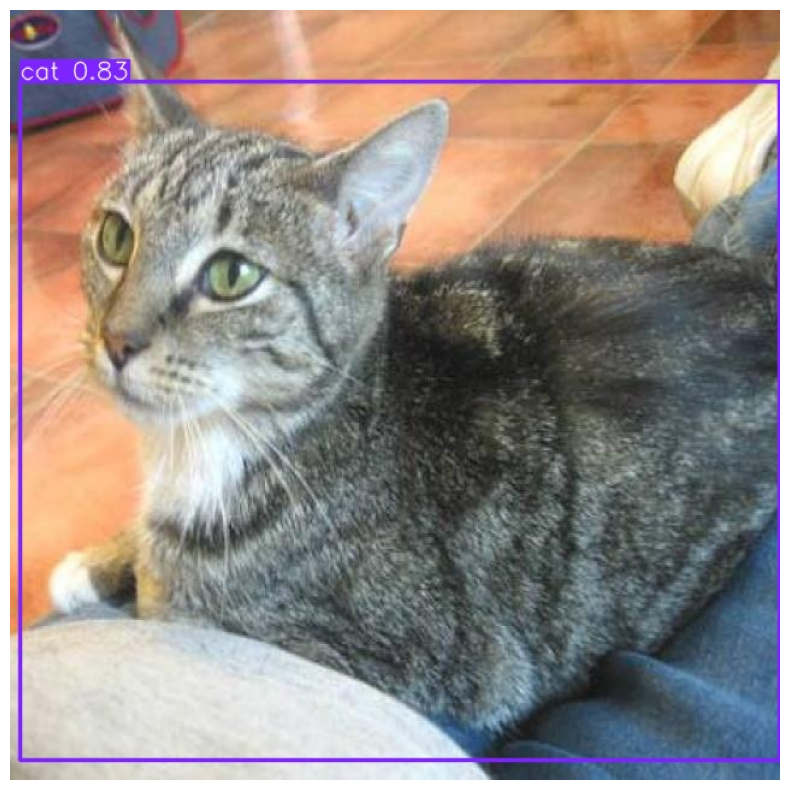

In [19]:
#Menampilkan hasil deteksi gambar dari model yang di uji / menampilkan hasil dari prediksi nya
hasil=Image.open("/content/runs/detect/predict2/cat_4028_jpg.rf.8541cee1edad9676784cad3a6114a975.jpg")
plt.figure(figsize=(15,10))
plt.imshow(hasil)
plt.axis("off")
plt.show()

#Lakukan training kembali dengan epoch 75 atau epoch 100
Tampilkan hasil nya seperti langkah sebelumnya

#Buatlah kesimpulan nya dari hasil training epoch 50 dan epoch 75 apakah hasil nya berbeda

Setelah menyelesaikan training dengan 50 epoch, langkah selanjutnya sesuai template tugas adalah melakukan training kembali dengan jumlah epoch yang lebih banyak, yaitu 75 epoch.

Tujuannya adalah untuk melihat apakah memberikan lebih banyak waktu belajar kepada model dapat meningkatkan performanya. Kode yang digunakan sama persis dengan sebelumnya, hanya nilai argumen epochs yang diubah dari 50 menjadi 75.

In [21]:
#Mulai Melakukan Training dengan 50 epoch
model= YOLO()
model.train(data='/content/CatDetection-1/data.yaml', epochs=75)

Ultralytics 8.3.165 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/CatDetection-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=75, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pret

train: Scanning /content/CatDetection-1/train/labels.cache... 1095 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1095/1095 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 421.3±179.9 MB/s, size: 40.9 KB)


val: Scanning /content/CatDetection-1/valid/labels.cache... 105 images, 0 backgrounds, 0 corrupt: 100%|██████████| 105/105 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 75 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/75       2.5G      1.246      2.043      1.766         24        640: 100%|██████████| 69/69 [00:24<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.75it/s]

                   all        105        122       0.75      0.639      0.674      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/75      2.88G       1.31      1.506      1.798         23        640: 100%|██████████| 69/69 [00:21<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.75it/s]

                   all        105        122      0.562      0.579      0.535      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/75      2.88G      1.376      1.431      1.845         18        640: 100%|██████████| 69/69 [00:22<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.89it/s]

                   all        105        122      0.616      0.508      0.543       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/75      2.88G      1.376      1.347      1.839         17        640: 100%|██████████| 69/69 [00:23<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.59it/s]


                   all        105        122       0.64      0.598       0.56      0.237

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/75      2.88G      1.365      1.266      1.836         28        640: 100%|██████████| 69/69 [00:21<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]

                   all        105        122      0.769      0.628      0.646      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/75      2.88G      1.357      1.257      1.817         20        640: 100%|██████████| 69/69 [00:22<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.56it/s]

                   all        105        122      0.736       0.68      0.658       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/75      2.88G      1.337      1.179      1.808         22        640: 100%|██████████| 69/69 [00:22<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.60it/s]

                   all        105        122      0.649       0.53      0.578      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/75      2.88G      1.316      1.171      1.789         21        640: 100%|██████████| 69/69 [00:21<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.61it/s]

                   all        105        122      0.767      0.622      0.682      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/75      2.88G      1.302      1.125      1.755         18        640: 100%|██████████| 69/69 [00:22<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.52it/s]

                   all        105        122      0.832      0.672      0.725      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/75      2.88G      1.299      1.118      1.785         20        640: 100%|██████████| 69/69 [00:22<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]

                   all        105        122      0.824      0.738      0.758      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/75      2.88G      1.261      1.108      1.735         24        640: 100%|██████████| 69/69 [00:21<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.25it/s]

                   all        105        122      0.887      0.721      0.797      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/75      2.88G      1.259      1.072      1.731         21        640: 100%|██████████| 69/69 [00:22<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.55it/s]

                   all        105        122      0.656      0.533      0.548      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/75      2.88G      1.257      1.062      1.728         20        640: 100%|██████████| 69/69 [00:22<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.73it/s]

                   all        105        122      0.859      0.705      0.774      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/75      2.88G      1.228      1.044       1.71         20        640: 100%|██████████| 69/69 [00:20<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.59it/s]

                   all        105        122      0.569      0.574      0.562      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/75      2.88G      1.213      1.022      1.694         21        640: 100%|██████████| 69/69 [00:22<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.58it/s]

                   all        105        122      0.706      0.664        0.7      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/75      2.88G      1.203       1.02      1.684         14        640: 100%|██████████| 69/69 [00:23<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.10it/s]

                   all        105        122      0.845      0.656      0.744      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/75      2.88G      1.165     0.9604      1.657         19        640: 100%|██████████| 69/69 [00:21<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]

                   all        105        122      0.902      0.664      0.752       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/75      2.88G      1.205      0.999       1.68         19        640: 100%|██████████| 69/69 [00:21<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.24it/s]

                   all        105        122       0.86      0.721      0.763      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/75      2.88G      1.176     0.9728      1.668         25        640: 100%|██████████| 69/69 [00:22<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.23it/s]

                   all        105        122      0.737      0.665      0.744      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/75      2.88G      1.205     0.9813      1.687         24        640: 100%|██████████| 69/69 [00:20<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.79it/s]

                   all        105        122      0.847      0.774      0.802       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/75      2.88G       1.17     0.9275      1.657         23        640: 100%|██████████| 69/69 [00:22<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.04it/s]

                   all        105        122      0.841      0.746      0.781       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/75      2.88G      1.155     0.9348      1.647         21        640: 100%|██████████| 69/69 [00:20<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.24it/s]

                   all        105        122       0.74      0.475      0.605      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/75      2.88G      1.163     0.9289       1.65         14        640: 100%|██████████| 69/69 [00:20<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.81it/s]

                   all        105        122       0.91      0.713        0.8      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/75      2.88G      1.134     0.9032      1.628         20        640: 100%|██████████| 69/69 [00:22<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.36it/s]

                   all        105        122      0.922       0.73      0.797      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/75      2.88G      1.125     0.9408      1.616         21        640: 100%|██████████| 69/69 [00:21<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        105        122      0.849      0.781      0.826      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/75      2.88G      1.137      0.946      1.632         26        640: 100%|██████████| 69/69 [00:21<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.31it/s]

                   all        105        122      0.918      0.746       0.82      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/75      2.88G      1.123     0.8762      1.613         18        640: 100%|██████████| 69/69 [00:22<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.68it/s]

                   all        105        122      0.887      0.746      0.809      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/75      2.88G      1.127     0.8904      1.632         16        640: 100%|██████████| 69/69 [00:21<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.72it/s]

                   all        105        122      0.868      0.752      0.825      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/75      2.88G      1.111     0.8849      1.612         14        640: 100%|██████████| 69/69 [00:21<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.84it/s]

                   all        105        122      0.901      0.747      0.839      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/75      2.88G      1.118     0.8504      1.616         16        640: 100%|██████████| 69/69 [00:22<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.28it/s]

                   all        105        122      0.889      0.654      0.807      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/75      2.88G      1.125     0.8668      1.626         14        640: 100%|██████████| 69/69 [00:20<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.11it/s]

                   all        105        122      0.816      0.664      0.753      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/75      2.88G      1.093     0.8502      1.594         26        640: 100%|██████████| 69/69 [00:22<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.25it/s]

                   all        105        122      0.878      0.746      0.828      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/75      2.88G      1.107     0.8407      1.599         17        640: 100%|██████████| 69/69 [00:21<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.93it/s]

                   all        105        122        0.9      0.746       0.82      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/75      2.88G      1.083     0.8186      1.591         19        640: 100%|██████████| 69/69 [00:20<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.87it/s]

                   all        105        122      0.864      0.728      0.785      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/75      2.88G      1.086      0.842      1.586         19        640: 100%|██████████| 69/69 [00:22<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.93it/s]

                   all        105        122      0.894      0.758      0.813      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/75      2.88G      1.084     0.8296      1.581         21        640: 100%|██████████| 69/69 [00:21<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.53it/s]

                   all        105        122      0.866      0.721       0.82      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/75      2.88G       1.08     0.8083      1.577         22        640: 100%|██████████| 69/69 [00:21<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.04it/s]

                   all        105        122       0.93       0.76      0.851      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/75      2.88G      1.083     0.8267       1.58         17        640: 100%|██████████| 69/69 [00:22<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.95it/s]

                   all        105        122      0.913      0.738       0.84      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/75      2.88G      1.089     0.8281      1.598         14        640: 100%|██████████| 69/69 [00:21<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.09it/s]

                   all        105        122      0.821      0.753      0.789      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/75      2.88G      1.091     0.8111      1.585         14        640: 100%|██████████| 69/69 [00:20<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.07it/s]

                   all        105        122      0.915      0.705      0.815      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/75      2.88G      1.065     0.7884      1.565         19        640: 100%|██████████| 69/69 [00:22<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.54it/s]

                   all        105        122      0.909      0.705      0.827      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/75      2.88G      1.064     0.7841      1.559         20        640: 100%|██████████| 69/69 [00:21<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        105        122      0.878      0.711       0.82      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/75      2.88G       1.01     0.7646      1.515         21        640: 100%|██████████| 69/69 [00:20<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.26it/s]

                   all        105        122      0.913       0.73      0.843      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/75      2.88G      1.029     0.7794      1.538         27        640: 100%|██████████| 69/69 [00:22<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.23it/s]

                   all        105        122      0.852      0.802      0.843      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/75      2.88G       1.03     0.7584      1.528         24        640: 100%|██████████| 69/69 [00:20<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.65it/s]


                   all        105        122       0.92      0.756      0.851      0.531

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/75      2.88G      1.047     0.7854      1.548         19        640: 100%|██████████| 69/69 [00:21<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.41it/s]

                   all        105        122      0.934      0.721      0.855      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/75      2.88G      1.008     0.7411      1.517         24        640: 100%|██████████| 69/69 [00:22<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.33it/s]

                   all        105        122      0.898       0.77       0.86      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/75      2.88G      1.009      0.744      1.523         22        640: 100%|██████████| 69/69 [00:21<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.38it/s]

                   all        105        122      0.895      0.762      0.845      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/75      2.88G     0.9753     0.7292      1.503         25        640: 100%|██████████| 69/69 [00:21<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.66it/s]

                   all        105        122      0.908       0.77      0.864        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/75      2.88G     0.9895     0.7237      1.503         19        640: 100%|██████████| 69/69 [00:22<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.48it/s]

                   all        105        122      0.922      0.776      0.856      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/75      2.88G     0.9772     0.6852      1.493         25        640: 100%|██████████| 69/69 [00:20<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.63it/s]

                   all        105        122      0.938      0.762       0.87      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/75      2.88G     0.9557     0.6882      1.475         27        640: 100%|██████████| 69/69 [00:21<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.93it/s]

                   all        105        122      0.924      0.721      0.832      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/75      2.88G     0.9681     0.6939      1.492         17        640: 100%|██████████| 69/69 [00:22<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.60it/s]

                   all        105        122      0.978      0.744      0.875      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/75      2.88G     0.9508     0.6819      1.474         18        640: 100%|██████████| 69/69 [00:21<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.69it/s]

                   all        105        122      0.923      0.782      0.855       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/75      2.88G     0.9658       0.72      1.484         19        640: 100%|██████████| 69/69 [00:22<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.25it/s]

                   all        105        122      0.877      0.759       0.84      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/75      2.88G     0.9626     0.6872      1.484         16        640: 100%|██████████| 69/69 [00:23<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]

                   all        105        122       0.93      0.761      0.822      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/75      2.88G     0.9633      0.678      1.466         24        640: 100%|██████████| 69/69 [00:21<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.13it/s]

                   all        105        122      0.932       0.68      0.818      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/75      2.88G     0.9239     0.6692      1.452         23        640: 100%|██████████| 69/69 [00:22<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.13it/s]

                   all        105        122      0.885      0.779      0.875      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/75      2.88G     0.9291     0.6718      1.448         16        640: 100%|██████████| 69/69 [00:23<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.34it/s]

                   all        105        122      0.928      0.779      0.858      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/75      2.88G     0.9031     0.6323      1.434         19        640: 100%|██████████| 69/69 [00:21<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.61it/s]

                   all        105        122      0.891      0.787      0.862      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/75      2.88G     0.9284      0.663      1.447         26        640: 100%|██████████| 69/69 [00:21<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.59it/s]

                   all        105        122      0.885      0.756      0.853      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/75      2.88G     0.9135      0.662       1.44         22        640: 100%|██████████| 69/69 [00:23<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.31it/s]

                   all        105        122      0.931      0.768      0.872      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/75      2.88G     0.9134     0.6572      1.438         22        640: 100%|██████████| 69/69 [00:21<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.37it/s]


                   all        105        122      0.892      0.746      0.859      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/75      2.88G     0.8919     0.6289      1.431         15        640: 100%|██████████| 69/69 [00:21<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.92it/s]

                   all        105        122      0.914      0.738      0.858      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/75      2.88G     0.8848      0.628      1.412         22        640: 100%|██████████| 69/69 [00:22<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.98it/s]

                   all        105        122      0.907       0.73      0.844      0.515


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/75      2.88G     0.7923     0.5955      1.553         10        640: 100%|██████████| 69/69 [00:22<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.44it/s]

                   all        105        122      0.916      0.719      0.826      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/75      2.88G     0.7202     0.4909      1.474          7        640: 100%|██████████| 69/69 [00:19<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.10it/s]

                   all        105        122      0.881      0.795      0.859      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/75      2.88G     0.7298     0.4645      1.476          8        640: 100%|██████████| 69/69 [00:21<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.56it/s]

                   all        105        122      0.888      0.779      0.868      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/75      2.88G     0.7231     0.4886      1.464         12        640: 100%|██████████| 69/69 [00:19<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.22it/s]

                   all        105        122      0.903      0.779      0.857      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/75      2.88G     0.6854     0.4459      1.432          7        640: 100%|██████████| 69/69 [00:21<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.75it/s]

                   all        105        122       0.91      0.762      0.878      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/75      2.88G      0.689     0.4459      1.459          7        640: 100%|██████████| 69/69 [00:20<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.25it/s]

                   all        105        122      0.885       0.77      0.844      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/75      2.88G     0.6613     0.4297      1.422          7        640: 100%|██████████| 69/69 [00:20<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.35it/s]

                   all        105        122      0.939      0.752      0.847      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/75      2.88G     0.6636     0.4334      1.424          7        640: 100%|██████████| 69/69 [00:20<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        105        122      0.854      0.795      0.868      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/75      2.88G     0.6477     0.4212      1.399         13        640: 100%|██████████| 69/69 [00:20<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.95it/s]

                   all        105        122      0.903      0.746      0.864      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/75      2.88G     0.6412     0.4065      1.414          7        640: 100%|██████████| 69/69 [00:21<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.74it/s]

                   all        105        122      0.908      0.754      0.861      0.509



75 epochs completed in 0.487 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 5.5MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.165 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.65it/s]


                   all        105        122      0.917      0.754      0.851      0.531
Speed: 0.3ms preprocess, 2.9ms inference, 0.0ms loss, 6.9ms postprocess per image
Results saved to runs/detect/train4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bf33c30ca50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

##Hasil Training dari 75 Epoch

Setelah melakukan training selama 75 epoch, model menunjukkan peningkatan performa yang solid dan hasil yang sangat baik. Berikut adalah analisis dari setiap metrik yang dihasilkan:

<h3>hasil Confusion Matrix<h3>

<img src="https://drive.google.com/uc?export=view&id=1SdODqABRTdHssapv9ZHatxt8-Bkic1De" width="400" height="300">

Confusion matrix ini menunjukkan peningkatan performa model setelah dilatih lebih lama (75 epoch) dibandingkan dengan 50 epoch.

- Prediksi Benar (Kucing ke Kucing): Jumlah deteksi yang benar turun dari 103 menjadi 98.

- Kesalahan - Gagal Deteksi (False Negative): Jumlah kucing yang terlewat oleh model berkurang dari 23 menjadi 14. Ini adalah perbaikan yang signifikan.

- Kesalahan - Deteksi Salah (False Positive): Model lebih sering salah mendeteksi background sebagai kucing, meningkat dari 19 menjadi 24.

Kesimpulan Awal:

Meskipun prediksi yang benar sedikit menurun, model menjadi lebih sensitif dan lebih baik dalam menemukan kucing yang tersembunyi (jumlah gagal deteksi berkurang). Namun, ini dibarengi dengan risiko lebih tinggi untuk salah mendeteksi objek lain sebagai kucing.

<h3>hasil presision recall curve nya<h3>

<img src="https://drive.google.com/uc?export=view&id=1jRcZgf2lzRCOUMBhqeOGQR-iYiH0pa7k" width="400" height="300">

Kurva ini, sama seperti sebelumnya, mengevaluasi performa model deteksi. Sumbu Y (Precision) adalah tingkat akurasi prediksi, dan sumbu X (Recall) adalah kemampuan model menemukan semua objek yang ada.

Setelah training selama 75 epoch, performa model sedikit berubah. Skor utamanya, mAP@0.5, sekarang menjadi 0.851, atau 85.1%. Ini menunjukkan adanya sedikit penurunan performa dibandingkan dengan training 50 epoch yang menghasilkan mAP sebesar 0.876.

Penurunan ini bisa menjadi indikasi awal bahwa model mulai sedikit overfitting. Artinya, model menjadi terlalu 'hafal' dengan data training sehingga performanya pada data baru (data validasi) sedikit menurun. Meskipun begitu, skor 0.851 masih tergolong sangat baik.

<h3>hasil resul training<h3>

<img src="https://drive.google.com/uc?export=view&id=1rOOfWVPCAGbW-cy61MsdzNgGemwqrx7W" width="400" height="300">

Grafik ini menampilkan hasil belajar model yang sekarang telah dilatih selama 75 epoch.

- Grafik Loss (Kesalahan): Grafik di sebelah kiri (box_loss, cls_loss) masih menunjukkan tren menurun, meskipun penurunannya sudah lebih landai dibandingkan 50 epoch pertama. Ini menandakan model masih terus belajar, tetapi peningkatannya sudah tidak signifikan.

- Grafik Metrics (Akurasi): Grafik di sebelah kanan (precision, recall, mAP50) terlihat mulai mendatar (plateau) setelah sekitar epoch 50-60. Ini menunjukkan bahwa model telah mencapai performa puncaknya.

Kesimpulan:

Training hingga 75 epoch menunjukkan bahwa model sudah "matang" dan mencapai performa terbaiknya di sekitar 50-60 epoch. Penambahan epoch lebih lanjut (dari 50 ke 75) tidak memberikan peningkatan akurasi yang berarti lagi dan justru bisa berisiko overfitting.

<h3>Menampilkan hasil prediksi<h3>

<img src="https://drive.google.com/uc?export=view&id=14hdIlZnTIQjoWfsIDdEHhkgxl2A5QcVU" width="400" height="300">




### Kesimpulan Akhir: Perbandingan Training 50 vs 75 Epoch
Ya, hasil training antara 50 epoch dan 75 epoch menunjukkan adanya perbedaan. Meskipun training yang lebih lama sering diasumsikan lebih baik, dalam kasus ini hasilnya lebih kompleks dan menarik.

Perbandingannya:

- Performa Puncak (mAP): Performa puncak model (skor mAP@0.5) sebenarnya sedikit lebih baik pada 50 epoch (0.876) dibandingkan dengan 75 epoch (0.851).

- Kemampuan Menemukan Kucing (Recall): Pada 75 epoch, model menjadi lebih baik dalam menemukan kucing yang mungkin terlewat. Ini terlihat dari turunnya jumlah False Negative (gagal deteksi) dari 23 menjadi hanya 14.

- Tingkat Kesalahan (Precision): Namun, pada 75 epoch, model juga menjadi lebih sering membuat kesalahan dengan mendeteksi background sebagai kucing. Ini terlihat dari naiknya jumlah False Positive dari 19 menjadi 24.

Mengapa Ini Terjadi?

Fenomena ini mengindikasikan bahwa setelah 50 epoch, model mulai mengalami sedikit overfitting. Artinya, model menjadi terlalu 'ahli' atau 'hafal' pada data training. Akibatnya, ia menjadi lebih sensitif (baik dalam menemukan kucing) tetapi juga lebih ceroboh (lebih sering salah tebak pada background). Grafik results juga mengkonfirmasi hal ini, di mana kurva akurasi sudah mulai mendatar setelah epoch 50.

---

Jadi Training selama 50 epoch sudah cukup dan menghasilkan model yang paling seimbang dan optimal untuk dataset ini. Menambah training hingga 75 epoch tidak memberikan peningkatan akurasi yang signifikan, dan justru menunjukkan tanda-tanda awal overfitting.

Oleh karena itu, model hasil training 50 epoch adalah pilihan terbaik karena memiliki akurasi keseluruhan (mAP) yang sedikit lebih tinggi dan keseimbangan yang lebih baik antara kemampuan menemukan kucing dan menghindari kesalahan deteksi.